<a href="https://www.kaggle.com/code/punyamodi/tesla-stock-prediciting?scriptVersionId=140567682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv
/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv


In [138]:
training=pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')
print(training.head())
print(training.tail())

         Date  Open  High   Low  Close  Adj Close     Volume
0  2018-06-22 23.44 23.48 22.13  22.24      22.24  153991500
1  2018-06-25 22.01 22.56 21.83  22.20      22.20  103969500
2  2018-06-26 22.40 22.90 21.72  22.80      22.80  111787500
3  2018-06-27 23.00 23.39 22.63  22.97      22.97  125005500
4  2018-06-28 23.24 23.80 23.07  23.33      23.33  125970000
            Date   Open   High    Low  Close  Adj Close     Volume
1252  2023-06-14 260.17 261.57 250.50 256.79     256.79  170575500
1253  2023-06-15 248.40 258.95 247.29 255.90     255.90  160171200
1254  2023-06-16 258.92 263.60 257.21 260.54     260.54  167563700
1255  2023-06-20 261.50 274.75 261.12 274.45     274.45  165611200
1256  2023-06-21 275.13 276.99 257.78 259.46     259.46  210937500


In [139]:
training.shape
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


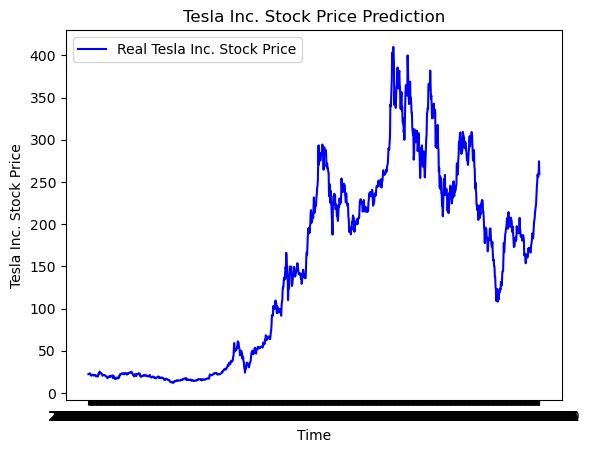

In [140]:
# Visualising the results
plt.plot(training["Date"],training["Close"], color='blue', label='Real Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

In [141]:
print(training['Close'].equals(training['Adj Close']))

True


From this we can see that dataset has no non-null values, and has shape 1257x7

also we get to know column close and adj close are same so we can remove adj close from datat set

In [142]:
X=pd.DataFrame()
X=training[["Open","High","Low","Volume"]].copy()
y=pd.Series()
y=training[["Close"]].copy()
X.shape

(1257, 4)

In [143]:
y.shape

(1257, 1)

Hence i have succesfully created 2 dataframes with relevant data needed to feed to ml model

Converting all data within 0 to 1 range

In [144]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
#X= sc.fit_transform(X)
#y=sc.fit_transform(y)

In [145]:
print(y)
print(X)

      Close
0     22.24
1     22.20
2     22.80
3     22.97
4     23.33
...     ...
1252 256.79
1253 255.90
1254 260.54
1255 274.45
1256 259.46

[1257 rows x 1 columns]
       Open   High    Low     Volume
0     23.44  23.48  22.13  153991500
1     22.01  22.56  21.83  103969500
2     22.40  22.90  21.72  111787500
3     23.00  23.39  22.63  125005500
4     23.24  23.80  23.07  125970000
...     ...    ...    ...        ...
1252 260.17 261.57 250.50  170575500
1253 248.40 258.95 247.29  160171200
1254 258.92 263.60 257.21  167563700
1255 261.50 274.75 261.12  165611200
1256 275.13 276.99 257.78  210937500

[1257 rows x 4 columns]


In [146]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.25,shuffle=False)


# Preparing Data For Training

# Here For LSTM, we havr to Introduce Lag to predict Future stock, hence adding columns of last 10 days to current data to predict the price after 10 days.

In [147]:
y_train=y_train.iloc[2:]
y_test=y_test.iloc[2:]
X_train = X_train.iloc[:-2]
X_test = X_test.iloc[:-2]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(940, 1)
(940, 4)
(313, 1)
(313, 4)


In [162]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

timesteps = 1

# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], timesteps, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])

model = keras.Sequential([
    layers.LSTM(512, activation='relu', input_shape=(timesteps, X_train_array.shape[1])),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    batch_size=256,
    epochs=1000,
)



Epoch 1/1000
4/4 [==============================] - 2s 139ms/step - loss: 1620116.8750 - val_loss: 928345.3750
Epoch 2/1000
4/4 [==============================] - 0s 51ms/step - loss: 1489669.2500 - val_loss: 5891.9570
Epoch 3/1000
4/4 [==============================] - 0s 51ms/step - loss: 1213406.5000 - val_loss: 1393035.5000
Epoch 4/1000
4/4 [==============================] - 0s 64ms/step - loss: 1017222.0000 - val_loss: 817097.0000
Epoch 5/1000
4/4 [==============================] - 0s 52ms/step - loss: 1010340.6875 - val_loss: 60262.0078
Epoch 6/1000
4/4 [==============================] - 0s 53ms/step - loss: 700286.6250 - val_loss: 764857.2500
Epoch 7/1000
4/4 [==============================] - 0s 51ms/step - loss: 555525.9375 - val_loss: 824205.6250
Epoch 8/1000
4/4 [==============================] - 0s 51ms/step - loss: 1031446.9375 - val_loss: 253112.8438
Epoch 9/1000
4/4 [==============================] - 0s 50ms/step - loss: 444330.7500 - val_loss: 482815.9375
Epoch 10/1000


Test Data of Date 6/07/2023 for checking real life accuracy

10/10 [==============================] - 0s 5ms/step
(313, 1)


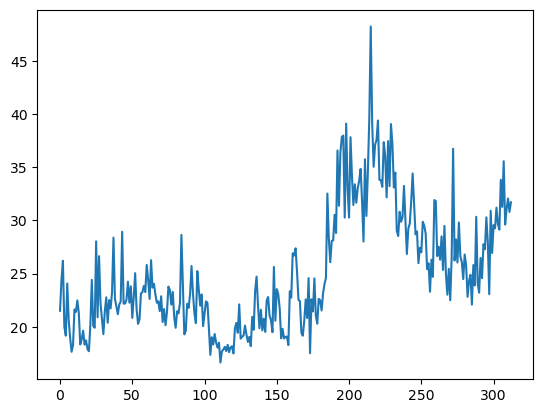

In [168]:
# Assuming X_test is a DataFrame
X_test_array = X_test.to_numpy()

# Reshape the array
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])

# Make predictions using the trained LSTM model
predictions = model.predict(X_test_reshaped)

# Reshape the predictions to match the original format
predictions = predictions.reshape(predictions.shape[0], 1)

plt.plot(predictions)
print(predictions.shape)

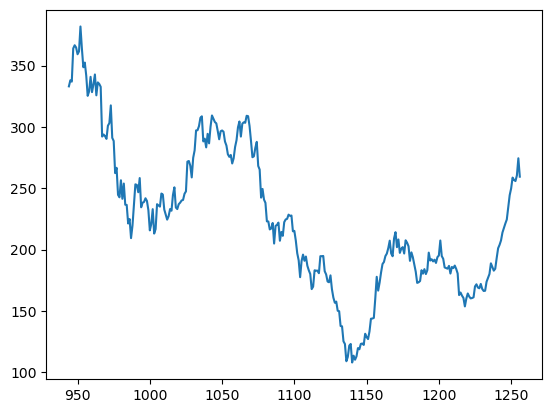

In [156]:
plt.plot(y_test)

# Adding Lag And Running Through Diffrent Models

In [ ]:
for i in range(1,3):
    X_train["Open_lag"+str(i)]=X_train["Open"].shift(i)
    X_train["High_lag"+str(i)]=X_train["High"].shift(i)
    X_train["Low_lag"+str(i)]=X_train["Low"].shift(i)
    X_train["Volume_lag"+str(i)]=X_train["Volume"].shift(i)
    X_train["Closing_lag"+str(i)]=y_train.shift(i)
X_train = X_train.dropna()
print(X_train)
print(X_train.shape)


In [ ]:
for i in range(1,3):
    X_test["Open_lag"+str(i)]=X_test["Open"].shift(i)
    X_test["High_lag"+str(i)]=X_test["High"].shift(i)
    X_test["Low_lag"+str(i)]=X_test["Low"].shift(i)
    X_test["Volume_lag"+str(i)]=X_test["Volume"].shift(i)
    X_test["Closing_lag"+str(i)]=y_test.shift(i)
X_test = X_test.dropna()
print(X_test)
print(X_test.shape)

In [ ]:
y_train=y_train.iloc[6:]
y_test=y_test.iloc[6:]
X_train = X_train.iloc[2:]
X_test = X_test.iloc[2:]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

# Using Lazy Regressor to Find Best Regressor

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
print(predictions,y_test)

# Prediction Of Stock Price 3 days In Future with  AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
res=regr.predict(X_test)
print(res,y_test)


In [ ]:
plt.plot(y_test)
plt.plot(res)

# Prediction Of Stock Price 3 days In Future with XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train,y_train)

# make predictions for test data
predictions = my_model.predict(X_test)
print(y_test,predictions)

from sklearn.metrics import mean_absolute_error   
meanerror = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:",(meanerror))

In [ ]:
y_test = y_test.reset_index(drop=True)
plt.plot(y_test)
plt.plot(predictions)

# Prediction Using Lag on Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred=pd.DataFrame(reg.predict(X_test))
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(y_test,y_pred)
print("The Mean Absolute Error Is:",mean_absolute_error(y_test, y_pred))

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)